# Accessing ESO database

Direct query
* `http://archive.eso.org/ssap?REQUEST=queryData&POS=123.269560,-34.57804&SIZE=0.2` and [parse XML](https://stackoverflow.com/questions/45755513/parse-xml-to-table-in-python)

## Example 1

[eso_ssa.py](http://archive.eso.org/programmatic/eso_ssa.py)

In [1]:
import sys
import pyvo as vo
from astropy.coordinates import SkyCoord
from astropy import units as u
import urllib

# Define the end point and the SSA service to query
ssap_endpoint = "http://archive.eso.org/ssap"
ssap_service = vo.dal.SSAService(ssap_endpoint)

In [2]:
ra = '05:37:09.9'
dec= '-80:28:09'
diameter = 0.5

In [3]:
pos = SkyCoord(ra=ra, dec=dec, unit=(u.hourangle, u.deg))
size = diameter*u.deg #u.Quantity(diameter, unit="deg")

In [4]:
ssap_resultset = ssap_service.search(pos=pos.fk5, diameter=size)

In [5]:
fields = ["COLLECTION", "TARGETNAME", "s_ra", "s_dec", "APERTURE",
          "em_min", "em_max", "SPECRP", "SNR", "t_min", "t_max",
          "CREATORDID", "access_url"]

In [6]:
# - Wavelengths are expressed in meters, for display they are converted to nanometers
# Also, count how many spectra have a SNR > min_SNR

harps_files=0
min_SNR = 0
separator=' '
for row in ssap_resultset:
    instrument = row["COLLECTION"].decode()
    if (instrument=='HARPS') and (row["SNR"] > min_SNR):
        harps_files += 1

In [7]:
harps_files

268

In [8]:
df=ssap_resultset.table.to_pandas()
df.head()

,access_estsize,access_url,APERTURE,COLLECTION,creation_type,CREATORDID,curation_reference,data_model,dataset_length,dataset_title,...,spatial_resolution,spec_ucd,SPECRP,t_elapsed,t_exptime,t_max,t_mid,t_min,TARGETNAME,WAVECALIB
0,5261,b'http://archive.eso.org/datalink/links?ID=ivo...,0.999972,b'HARPS',b'archival',b'ivo://eso.org/origfile?HARPS.2006-11-12T07:0...,b'',b'',313133,b'HD39091_HARPS.2006-11-12T07:00:36.286_s1d_A',...,NaN,b'',115000.0,0.004323,373.499,54051.296410,54051.294248,54051.292087,b'HD39091',b'absolute'
1,5261,b'http://archive.eso.org/datalink/links?ID=ivo...,0.999972,b'HARPS',b'archival',b'ivo://eso.org/origfile?HARPS.2006-11-12T06:5...,b'',b'',313133,b'HD39091_HARPS.2006-11-12T06:53:47.333_s1d_A',...,NaN,b'',115000.0,0.004323,373.502,54051.291676,54051.289515,54051.287353,b'HD39091',b'absolute'
2,5261,b'http://archive.eso.org/datalink/links?ID=ivo...,0.999972,b'HARPS',b'archival',b'ivo://eso.org/origfile?HARPS.2009-12-04T03:5...,b'',b'',313133,b'HD39091_HARPS.2009-12-04T03:54:10.452_s1d_A',...,NaN,b'',115000.0,0.002315,199.999,55169.164936,55169.163778,55169.162621,b'HD39091',b'absolute'
3,5261,b'http://archive.eso.org/datalink/links?ID=ivo...,0.999972,b'HARPS',b'archival',b'ivo://eso.org/origfile?HARPS.2009-12-03T03:5...,b'',b'',313138,b'HD39091_HARPS.2009-12-03T03:58:39.690_s1d_A',...,NaN,b'',115000.0,0.002315,199.998,55168.168052,55168.166895,55168.165737,b'HD39091',b'absolute'
4,5261,b'http://archive.eso.org/datalink/links?ID=ivo...,0.999972,b'HARPS',b'archival',b'ivo://eso.org/origfile?HARPS.2009-11-05T07:2...,b'',b'',313126,b'HD39091_HARPS.2009-11-05T07:23:15.251_s1d_A',...,NaN,b'',115000.0,0.005208,449.999,55140.313024,55140.310420,55140.307815,b'HD39091',b'absolute'


In [9]:
df.columns

Index(['access_estsize', 'access_url', 'APERTURE', 'COLLECTION',
       'creation_type', 'CREATORDID', 'curation_reference', 'data_model',
       'dataset_length', 'dataset_title', 'dp_id', 'em_bw', 'em_max', 'em_min',
       'em_val', 'equinox', 'flux_ucd', 'FORMAT', 'PUBDID', 'publisher',
       'rights', 's_dec', 's_ra', 's_region', 'SNR', 'space_frame',
       'spatial_resolution', 'spec_ucd', 'SPECRP', 't_elapsed', 't_exptime',
       't_max', 't_mid', 't_min', 'TARGETNAME', 'WAVECALIB'],
      dtype='object')

In [9]:
df['TARGETNAME'].apply(lambda x: str(x.decode()).replace('-','')).unique()

array(['HD39091', 'ASASSN15um'], dtype=object)

In [10]:
df["COLLECTION"] = df["COLLECTION"].apply(lambda x: x.decode())

In [11]:
df["dp_id"] = df["dp_id"].apply(lambda x: x.decode())

In [12]:
df["CREATORDID"] = df["CREATORDID"].apply(lambda x: x.decode())

In [13]:
df["access_url"][0][23:]

b'datalink/links?ID=ivo://eso.org/ID?ADP.2014-09-16T11:06:14.713&eso_download=file'

In [14]:
df["access_url"] = df["access_url"].apply(lambda x: x.decode()) #, row["CREATORDID"].decode()[23:]]

In [15]:
#url
df["access_url"][0]

'http://archive.eso.org/datalink/links?ID=ivo://eso.org/ID?ADP.2014-09-16T11:06:14.713&eso_download=file'

In [16]:
#filename
df['CREATORDID'][0][23:].replace(':','')

'HARPS.2006-11-12T070036.286_s1d_A_DRS_HARPS_3.5_ESOSDP.fits'

In [17]:
from tqdm import tqdm
from os.path import join

id={}
for i in tqdm(range(len(df))[:3]):
    instrument = df.loc[i,"COLLECTION"]
    if (instrument=='HARPS') and (df.loc[i,"SNR"] > min_SNR):
        dp_id = df.loc[i,"dp_id"]
        origfile = df.loc[i,"CREATORDID"][23:]
        id[origfile] = dp_id
        # The downloaded file is saved with the name provided by the creator of the file: origfile.
        # Though, care should be taken, because reduced products
        # generated by external users might have colliding CREATORDID!
        # This "demo" script does not take into consideration this risk.
        print("Fetching file with SNR=%f: %s.fits renamed to %s" %(df.loc[i,"SNR"], dp_id, origfile))
        url = df.loc[i,"access_url"]
        filename = join('../data',df.loc[i,"CREATORDID"][23:].replace(':',''))
        #urllib.request.urlretrieve(url, filename)

100%|██████████| 3/3 [00:00<00:00, 636.30it/s]

Fetching file with SNR=152.100000: ADP.2014-09-16T11:06:14.713.fits renamed to HARPS.2006-11-12T07:00:36.286_s1d_A_DRS_HARPS_3.5_ESOSDP.fits
Fetching file with SNR=140.500000: ADP.2014-09-16T11:07:17.520.fits renamed to HARPS.2006-11-12T06:53:47.333_s1d_A_DRS_HARPS_3.5_ESOSDP.fits
Fetching file with SNR=175.000000: ADP.2014-09-23T11:01:26.443.fits renamed to HARPS.2009-12-04T03:54:10.452_s1d_A_DRS_HARPS_3.5_ESOSDP.fits


### reading downloaded fits files

[see example](http://archive.eso.org/cms/eso-data/help/1dspectra.html#Python)

In [21]:
%matplotlib inline
import sys
import matplotlib.pyplot as pl
from astropy.io import fits as pf
import numpy as np

hdulist = pf.open( "../data/HARPS.2006-11-12T065347.333_s1d_A_DRS_HARPS_3.5_ESOSDP.fits" )

In [22]:
hdulist.info()

Filename: ../data/HARPS.2006-11-12T065347.333_s1d_A_DRS_HARPS_3.5_ESOSDP.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    3051   ()      
  1  SPECTRUM      1 BinTableHDU     46   1R x 3C   [313133D, 313133E, 313133E]   


In [23]:
# print column information
hdulist[1].columns

ColDefs(
    name = 'WAVE'; format = '313133D'; unit = 'Angstrom'
    name = 'FLUX'; format = '313133E'; unit = 'adu'
    name = 'ERR'; format = '313133E'; unit = 'adu'
)

Text(0.5, 0, 'Wavelength [$\\AA$]')

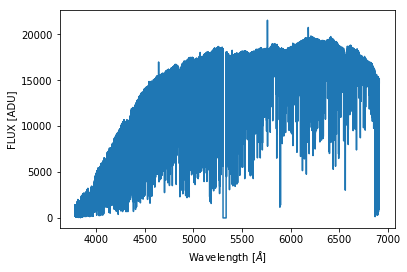

In [24]:
# get to the data part (in extension 1)
scidata = hdulist[1].data

wave = scidata[0][0]
flux = scidata[0][1]
err  = scidata[0][2]

pl.errorbar(wave, flux, yerr=err)
pl.ylabel('FLUX [ADU]')
pl.xlabel('Wavelength [$\AA$]')

## querying all tois

In [26]:
sys.path.append('../archive_digger')
import archive_digger as ad

tois = ad.get_tois() 

Saved: ../data/TOIs.csv


In [58]:
ras = tois['RA'].values#[:15]
decs= tois['Dec'].values#[:15]
tics= tois['TIC ID'].values#[:15]

min_snr = 1
harps = {}
uves  = {}
feros = {}
for ra,dec,tic in tqdm(zip(ras,decs,tics)):
    pos = SkyCoord(ra=ra, dec=dec, unit=(u.hourangle, u.deg))
    size = diameter*u.deg
    ssap_resultset = ssap_service.search(pos=pos.fk5, diameter=size)
    df=ssap_resultset.to_table().to_pandas()
    collection=df['COLLECTION'].apply(lambda x: x.decode())
    snr = df['SNR']
    df1=df[(collection=='HARPS') & (snr>min_snr)]
    df2=df[(collection=='UVES')  & (snr>min_snr)]
    df3=df[(collection=='FEROS') & (snr>min_snr)]
    harps[tic] = len(df1)
    uves[tic]  = len(df2)
    feros[tic] = len(df3)

0it [00:00, ?it/s]WARNING: AstropyDeprecationWarning: The truth value of a Quantity is ambiguous. In the future this will raise a ValueError. [astropy.units.quantity]
753it [08:44,  1.09it/s]


In [72]:
import pandas as pd

d=pd.DataFrame([harps,uves,feros]).T
d.columns=['harps','uves','feros']

In [77]:
final=pd.merge(d,tois,right_on='TIC ID', left_index=True)
# final=final[['harps','feros','TIC ID','TOI']].sort_values('TOI')
final.sort_values('TOI').to_csv('toi_with_eso_data.csv',index=False)

## Example 2

[raw_eso.py](http://archive.eso.org/programmatic/eso_raw.py)

In [18]:
import sys
import math
from pyvo.dal import tap

from astropy.coordinates import SkyCoord
from astropy import units as u
 
ESO_TAP_OBS = "http://archive.eso.org/tap_obs"
tapobs = tap.TAPService(ESO_TAP_OBS)
 
target = "Pi Men"
radius = 0.5 # degrees

print()
print("Looking for public SCIENCE HARPS frames around target %s in a cone of radius %f deg."   %(target, radius))
print("Querying the ESO TAP service at %s" %(ESO_TAP_OBS))

# --------------------------------------------------
# The actual position of the selected target
# is queried by the from_name() function,
# which queries the CDS SESAME service
# (http://cdsweb.u-strasbg.fr/cgi-bin/Sesame).
# --------------------------------------------------

print("The provided target is being resolved by SESAME...")
pos = SkyCoord(ra=ra, dec=dec, unit=(u.hourangle, u.deg))

print("SESAME coordinates for %s: %s" % (target, pos.to_string()))

cosd = math.cos( pos.dec.to_value() * math.pi/180. )
if ( math.fabs( pos.dec.to_value() - 90 ) < radius ):
    cosd = 1;

ra_min = pos.ra.to_value() - radius * cosd 
ra_max = pos.ra.to_value() + radius * cosd 
dec_min = pos.dec.to_value() - radius
dec_max = pos.dec.to_value() + radius

top = "TOP %d" % (3)

query="""SELECT %s object, ra, dec, tpl_start, prog_id, filter_path, dp_id
from dbo.raw
where ra  between %f and %f
  and dec between %f and %f
  and instrument='HARPS'
  and release_date < getdate()
  and dp_cat='SCIENCE' """ % ( top, ra_min, ra_max, dec_min, dec_max );

print(query)
 
res = tapobs.search(query=query)
print(res.to_table())


Looking for public SCIENCE HARPS frames around target Pi Men in a cone of radius 0.500000 deg.
Querying the ESO TAP service at http://archive.eso.org/tap_obs
The provided target is being resolved by SESAME...
SESAME coordinates for Pi Men: 84.2912 -80.4692
SELECT TOP 3 object, ra, dec, tpl_start, prog_id, filter_path, dp_id
from dbo.raw
where ra  between 84.208461 and 84.374039
  and dec between -80.969167 and -79.969167
  and instrument='HARPS'
  and release_date < getdate()
  and dp_cat='SCIENCE' 


DALQueryError: Unexpected error while executing a SQL query: The SELECT permission was denied on the object 'data_products', database 'obs_metadata', schema 'dbo'.